# Linear Regression

$y = w[0]x[0]+w[1]x[1]+ ... + w[p]x[p] + b$ 

..., where $x$ symbolises the features and $w$ and $b$ the parameters (coefficients and intercept)

In [1]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython import display

w[0]: 0.393906  b: -0.031804


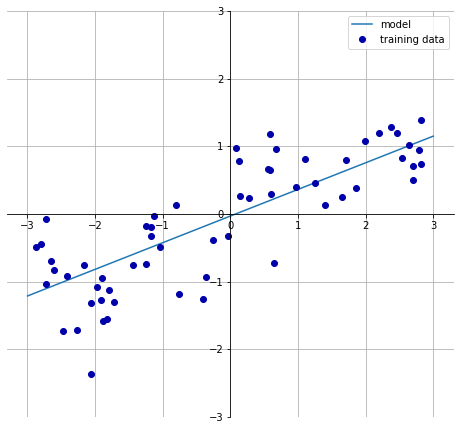

In [2]:
mglearn.plots.plot_linear_regression_wave()

In [16]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 520)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
lr = LinearRegression().fit(X_train,y_train)

In [17]:
lr.coef_

array([0.45814223])

In [18]:
lr.intercept_

0.045561883241755564

## R^2-Wert

In [19]:
lr.score(X_train,y_train)

0.6280686653939113

In [20]:
lr.score(X_test,y_test)

0.6790142992937466

If data is too complex, overfitting is very possible:

In [23]:
X, y = mglearn.datasets.load_extended_boston()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)
np.array([lr.coef_,lr.intercept_])

<ipython-input-26-3362d9b86696>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([lr.coef_,lr.intercept_])


array([array([-4.12710947e+02, -5.22432068e+01, -1.31898815e+02, -1.20041365e+01,
              -1.55107129e+01,  2.87163342e+01,  5.47040992e+01, -4.95346659e+01,
               2.65823927e+01,  3.70620316e+01, -1.18281674e+01, -1.80581965e+01,
              -1.95246830e+01,  1.22025403e+01,  2.98078144e+03,  1.50084257e+03,
               1.14187325e+02, -1.69700520e+01,  4.09613691e+01, -2.42636646e+01,
               5.76157466e+01,  1.27812142e+03, -2.23986944e+03,  2.22825472e+02,
              -2.18201083e+00,  4.29960320e+01, -1.33981515e+01, -1.93893485e+01,
              -2.57541277e+00, -8.10130128e+01,  9.66019367e+00,  4.91423718e+00,
              -8.12114800e-01, -7.64694179e+00,  3.37837099e+01, -1.14464390e+01,
               6.85083979e+01, -1.73753604e+01,  4.28128204e+01,  1.13988209e+00,
              -7.72696840e-01,  5.68255921e+01,  1.42875996e+01,  5.39551110e+01,
              -3.21709644e+01,  1.92709675e+01, -1.38852338e+01,  6.06343266e+01,
              -1

In [27]:
np.array([lr.score(X_train,y_train),
         lr.score(X_test,y_test)])

array([0.95205196, 0.6074722 ])

# Ridge Regression

Same setup but with constraints for coefficients. The coefficients should be as small as possible. To do so we add a penalty-term to the L2- or Euclidean-norm. Therefore the model is restricted and has a worse prediction power on training data but a higher probability that the prediction power on test data is better as normal linear regression.

In [30]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
np.array([ridge.coef_,ridge.intercept_])

<ipython-input-30-2e67ea51e89a>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([ridge.coef_,ridge.intercept_])


array([array([-1.41368408e+00, -1.55661895e+00, -1.46543409e+00, -1.26616071e-01,
              -7.91193605e-02,  8.33161023e+00,  2.54975060e-01, -4.94145701e+00,
               3.89862268e+00, -1.05866058e+00, -1.58433734e+00,  1.05103856e+00,
              -4.01220799e+00,  3.33720475e-01,  3.64725471e-03, -8.49295793e-01,
               7.44989267e-01, -1.43106836e+00, -1.62981017e+00, -1.40486294e+00,
              -4.47314366e-02, -1.74619880e+00, -1.46715888e+00, -1.33237111e+00,
              -1.69154625e+00, -5.06179637e-01,  2.62197591e+00, -2.09210002e+00,
               1.95074661e-01, -2.75469422e-01,  5.11308202e+00, -1.67083739e+00,
              -9.81863179e-02,  6.34477127e-01, -6.10008281e-01,  4.01805897e-02,
              -1.27661999e+00, -2.91349679e+00,  3.39544035e+00,  7.91904036e-01,
               1.35260232e+00, -4.03661265e+00,  2.32361734e+00, -3.36712926e+00,
               1.81279204e+00,  3.01566897e+00, -1.89452070e+00, -2.50844073e-01,
              -2

In [29]:
np.array([ridge.score(X_train,y_train),
         ridge.score(X_test,y_test)])

array([0.88579666, 0.75276835])

We can adjust the penalty by the parameter alpha. If alpha is high the coefficients are smaller:

In [54]:
training_accuracy = []
test_accuracy = []
alpha = np.arange(1000)/10

for alph in alpha:
    ridge_alpha = Ridge(alpha = alph).fit(X_train,y_train)
    training_accuracy.append(ridge_alpha.score(X_train,y_train))
    test_accuracy.append(ridge_alpha.score(X_test,y_test))
    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.23249e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


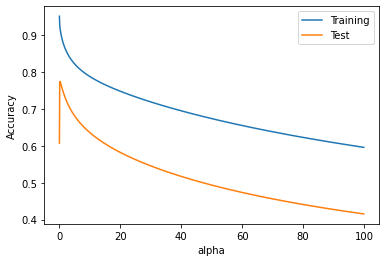

In [57]:
plt.plot(alpha, training_accuracy, label = "Training")
plt.plot(alpha, test_accuracy, label = "Test")
plt.ylabel("Accuracy")
plt.xlabel("alpha")
plt.legend()

# Lasso

Similar to ridge regression, Lasso decreases the coefficient but by penalising w.r.t the L1-norm (on the sum of the coefficients). Therefore, some coefficients can be 0. It is as an automated selection of features.

In [58]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

np.array([lasso.score(X_train,y_train),lasso.score(X_test,y_test)])

array([0.29323769, 0.20937503])

In [60]:
np.array([np.sum(lasso.coef_ != 0),np.sum(lasso.coef_ == 0)])

array([  4, 100])

In [67]:
training_accuracy = []
test_accuracy = []
Used_Features =[]
alpha = np.arange(10)/100

for alph in alpha:
    lasso_alpha = Lasso(alpha = alph, max_iter = 1000).fit(X_train,y_train)
    training_accuracy.append(lasso_alpha.score(X_train,y_train))
    test_accuracy.append(lasso_alpha.score(X_test,y_test))
    Used_Features.append(np.sum(lasso_alpha.coef_ != 0)/104)

<ipython-input-67-0aae9c114547>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_alpha = Lasso(alpha = alph, max_iter = 1000).fit(X_train,y_train)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 927.3037619237189, tolerance: 3.233182126649077
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.90245800317825, toleranc

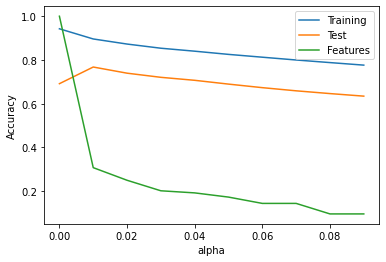

In [68]:
plt.plot(alpha, training_accuracy, label = "Training")
plt.plot(alpha, test_accuracy, label = "Test")
plt.plot(alpha, Used_Features, label = "Features")
plt.ylabel("Accuracy")
plt.xlabel("alpha")
plt.legend()

# Linear models for classification

We use linear Regression to separate in classes by generating a limit between groups. We can use logistic regression to classify or a linear approach.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


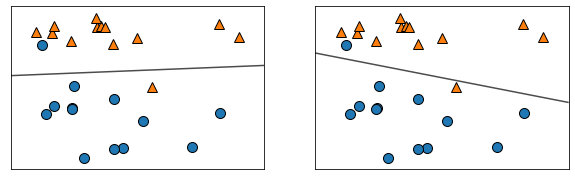

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize = (10,3))

for model, ax in zip([LinearSVC(),LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill = False, eps = 0.5, ax = ax, alpha = 0.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax = ax)

If parameter C is big we have less regulation and if C is small the coeficient values are low.

In [71]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,
                                                    random_state = 0)


In [97]:
training_accuracy = []
test_accuracy = []
Cs = np.array([0.01,0.02,0.1])

for C in Cs:
    logreg = LogisticRegression(C=C).fit(X_train,y_train)
    training_accuracy.append(logreg.score(X_train,y_train))
    test_accuracy.append(logreg.score(X_test,y_test))
    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

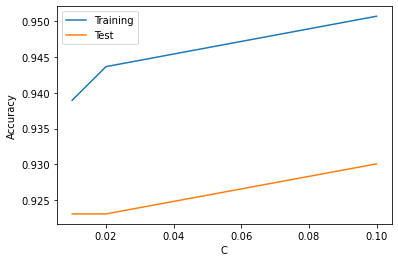

In [98]:
plt.plot(Cs, training_accuracy, label = "Training")
plt.plot(Cs, test_accuracy, label = "Test")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

## Multiple Categories

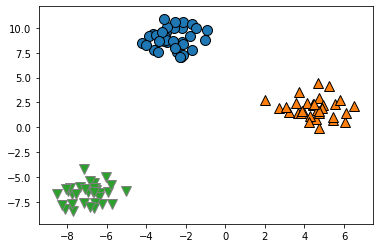

In [99]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [100]:
linear_svm = LinearSVC().fit(X,y)

In [101]:
np.array([linear_svm.coef_.shape,linear_svm.intercept_.shape])

<ipython-input-101-eecc36b0b53d>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([linear_svm.coef_.shape,linear_svm.intercept_.shape])


array([(3, 2), (3,)], dtype=object)

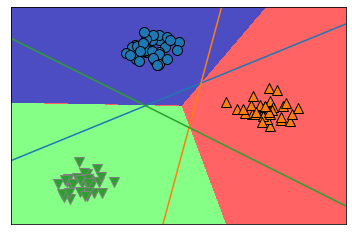

In [104]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill = True,alpha = .7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 ['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1])